# Assignment 3 Text Analysis
INST447 Spring 2021 - Farmer<br>
**Zac Foss**


Resources
- https://docs.python.org/3/library/re.html
- https://www.dataquest.io/blog/regex-cheatsheet/
- http://www.pyregex.com/

In [1]:
# import modules
import re, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datapath = "/Users/zacfo/Downloads/" # change to your location

# Part A: Applied Regular Expressions

## Email Server Logs
This is a typical server log for an email server. Administrators often use regex to make sense of it.

Create a DataFrame with the date, time, ip address, email address, and the reason it was blocked

In [2]:
f = open(datapath+'email_log.txt', 'r')
text = f.read()
print(text)
f.close()


# use regular expressions to select key elements
# create a data frame with this information
#myIter = re.finditer('(?P<date>\d{4}-\d{2}-\d{2}) (?P<time>\d{2}:\d{2}:\d{2}.\d{9}) (?P<ipaddress>\d{2}.\d{3}.\d{3}.\d{2}).*?\<(?P<email>\w+@[\w\.]+)\>', text)
myIter = re.finditer('(?P<date>\d{4}-\d{2}-\d{2}) (?P<time>\d{2}:\d{2}:\d{2}.\d{9}).*?(?P<ipaddress>\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}).*?\<(?P<email>\w+@[\w\.]+)\>.*?(?P<msg>(\w+) (\w+) (\w+) (\w+))' , text)
#myIter = re.finditer('(?P<date>\d{4}-\d{2}-\d{2}) (?P<time>\d{2}:\d{2}:\d{2}.\d{9}).*?(?P<ipaddress>\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}.*?\<(?P<email>\w+@[\w\.]+)\>).*?(?P<msg>\w+\s\w+\s\w+\s\w+)' , text)
#myIter = re.finditer('(?P<ipaddress>\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) (?P<time>\d{2}:\d{2}:\d{2}.\d{9})(?P<date>\d{4}-\d{2}-\d{2})' , text)
type(myIter)
print(myIter)
newList = []
for m in myIter:
    print(m['date']+ " " + m['time'] + " " + m['ipaddress'] + " " + m['email'] + " " + m['msg'] )
    newList.append({'date':m['date'], 'time':m['time'], 'ipaddress':m['ipaddress'], 'email':m['email'], 'msg':m['msg']})
    #print(m['date'] + " " + m['time'] + " " + m['ipaddress'] )
    #newList.append({'date':m['date'], 'time':m['time'], 'ipaddress':m['ipaddress']})
    #print(m['ipaddress'] + " " + m['time'] + " " + m['date'])
    #newList.append({'ipaddress':m['ipaddress'],'time':m['time'],'date':m['date']})

newDataFrame = pd.DataFrame(newList)
print(newDataFrame)

2008-11-08 06:32:46.354761500 26318 logging::logterse plugin: ` 89.223.216.72	apn-89-223-216-72.vodafone.hu	apn-89-223-216-72.vodafone.hu	<toshiter@donin.com>		rhsbl	901	Not supporting null originator (DSN)	msg denied before queued
2008-11-08 06:33:17.924158500 26331 logging::logterse plugin: ` 208.99.214.236	mx22.ecreditchoices7.com	mx22.ecreditchoices7.com	<moneydiet2@mx22.ecreditchoices7.com>		dnsbl	903	http://www.spamhaus.org/SBL/sbl.lasso?query=SBL69049	msg denied before queued
2008-11-08 06:34:53.318459500 26358 logging::logterse plugin: ` 84.58.57.150	dslb-084-058-057-150.pools.arcor-ip.net	rpemgmu.arcor-ip.net	<sundered@ancientinc.com>		dnsbl	903	http://www.spamhaus.org/query/bl?ip=84.58.57.150	msg denied before queued
2008-11-08 06:35:41.724563500 26375 logging::logterse plugin: ` 58.126.113.198	Unknown	[58.126.113.198]	<benny@surecom.com>		rhsbl	901	Not supporting null originator (DSN)	msg denied before queued
2008-11-08 06:37:31.730609500 26398 logging::logterse plugin: ` 87

## Single Raw Email
For e-discovery (the process of identifying computer-based evidence for legal cases), sometimes you need to get information out of raw email files. Or maybe you are trying to automate a process, like support tickets, through email. Regex is a powerful way to extract the data.

In [4]:
f = open(datapath+'raw_email.txt', 'r')
text = f.read()
print(text)
f.close()

Delivered-To: dheidenb@g.umd.edu
Received: by 10.107.97.16 with SMTP id v16csp1457303iob;
        Fri, 6 Apr 2018 23:52:05 -0700 (PDT)
X-Google-Smtp-Source: AIpwx49QF9wByhFrrDVu8jOcevoYTjBgsXVpFigpy/M+frwwbaztCehK85I/7Agu5xHy6h+wiY40
X-Received: by 2002:a17:902:44c:: with SMTP id 70-v6mr30630830ple.354.1523083925115;
        Fri, 06 Apr 2018 23:52:05 -0700 (PDT)
ARC-Seal: i=1; a=rsa-sha256; t=1523083925; cv=none;
        d=google.com; s=arc-20160816;
        b=mHordDyZArJVKMkNOjGxO788LUlIsOruQk0uDRLD6/aYXlgFwfvPlw1c4HIIYwHPbK
         ppHYGm1o+7e8BpGHn2YRYbeS6SlndcVdbA3pel5P5iVbyy8hjFuHfqRElNEMXBJHAzOl
         D6O0YSaN/x2rhurT+a8IIxlsT7tsfjrN1lcoOAOA/kOOWqWEBHUFeVUOivHrYWyDB/+5
         mlQ/d/6yF9XDZSkC1P4WV3KdJJ1fdtv99MtcYIOpkr13AR11aCUldZnjdaM3odqxhyAl
         gR2BoN/Am2u07m0F0F2KZUT3u9GHrqylRzrrKNtKKXuttNmeohUaSd7hr0G4N6sh9yH2
         vXdg==
ARC-Message-Signature: i=1; a=rsa-sha256; c=relaxed/relaxed; d=google.com; s=arc-20160816;
        h=sender:errors-to:content-transfer-encod

In [5]:
# Get the email addresses of the lists this was sent to using regular expressions
re.findall("(?:To:).*?(<[\w.-]+@[\w.-]+>).*?(<[\w.-]+@[\w.-]+>)", text)


[('<ethics@listserv.aoir.org>', '<air-l@listserv.aoir.org>')]

In [6]:
# Get the name of the sender using regular expressions
re.search("(?:From:).*?((\w+) \w+\. (\w+))", text)

<re.Match object; span=(4001, 4022), match='From: "Charles M. Ess'>

In [7]:
# Get the email of the sender using regular expressions
re.findall("(?:From:).*?(<[\w.-]+@[\w.-]+>)", text)

['<c.m.ess@media.uio.no>']

In [8]:
# Find all the IP addresses using regular expressions
re.findall("(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})", text)

['10.107.97.16',
 '68.232.143.84',
 '018.04.06.23',
 '64.90.62.202',
 '64.90.62.202',
 '129.240.10.50',
 '129.240.10.40',
 '42.249.16.62',
 '62.16.249.42',
 '192.168.1.122',
 '62.16.249.42',
 '62.16.249.42',
 '192.168.1.122']

## Multiple Raw Emails
From: https://www.kaggle.com/rtatman/fraudulent-email-corpus
* See acknowledgements required if this data is to be used in formal papers (not this assignment)

**Context:**
Fraudulent e-mails contain criminally deceptive information, usually with the intent of convincing the recipient to give the sender a large amount of money. Perhaps the best known type of fraudulent e-mails is the Nigerian Letter or “419” Fraud.

**Content:**
This dataset is a collection of more than 2,500 "Nigerian" Fraud Letters, dating from 1998 to 2007.

These emails are in a single text file. Each e-mail has a header which includes the following information:

- Return-Path: address the email was sent from
- X-Sieve: the X-Sieve host (always cmu-sieve 2.0)
- Message-Id: a unique identifier for each message
- From: the message sender (sometimes blank)
- Reply-To: the email address to which replies will be sent
- To: the email address to which the e-mail was originally set (some are truncated for anonymity)
- Date: Date e-mail was sent
- Subject: Subject line of e-mail
- X-Mailer: The platform the e-mail was sent from
- MIME-Version: The Multipurpose Internet Mail Extension version
- Content-Type: type of content & character encoding
- Content-Transfer-Encoding: encoding in bits
- X-MIME-Autoconverted: the type of autoconversion done
- Status: r (read) and o (opened)

In [9]:
# I created a minimized version of the original file.
f = open(datapath+'fraudulent_emails_minimized.txt', 'r', encoding="ISO-8859-1")
text = f.read()
print(text)
f.close()

 PLANE CRASH SINCE
WE GOT INFORMATION ABOUT HIS DEATH=2C WE HAVE BEEN
EXPECTING HIS NEXT OF KIN TO COME OVER AND CLAIM HIS
MONEY BECAUSE WE CANNOT RELEASE IT UNLESS SOMEBODY
APPLIES FOR IT AS NEXT OF KIN OR RELATION TO THE
DECEASED AS INDICATED IN OUR BANKING GUIDELINES=2E

UNFORTUNATELY WE LEARNT THAT ALL HIS SUPPOSED NEXT
OF KIN OR RELATIONS DIED ALONG WITH HIM AT THE PLANE
CRASH LEAVING NOBODY BEHIND FOR THE CLAIM=2E IT IS
THEREFORE UPON THIS DISCOVERY THAT I AND OTHER
OFFICIALS IN THE DEPARTMENT NOW DECIDED TO MAKE
BUSINESS WITH YOU AND RELEASED THE MONEY TO YOU AS THE
NEXT OF KIN OR RELATION OF THE DECEASED FOR SAFETY AND
SUBSEQUENT DISBURSEMENT SINCE NOBODY IS COMING FOR IT
AND WE DON'T WANT THIS MONEY TO GO DISBURSEMENT
ACCOUNT AS UNCLAIMED BILL=2E THE BANKING LAW AND
GUIDELINES HERE STIPULATED THAT IF SUCH MONEY REMAINED
UNCLAIMED AFTER FOUR YEARS=2C THE MONEY WILL BE
TRANSFERRED INTO FEDERAL GOVERNMENT ACCOUNT AS
UNCLAIMED FUND=2E THE REQUEST OF A FOREIGNER AS NEXT OF
KIN IN T

In [10]:
# Get the "Subject:" of the emails using regular expressions and put them in a dataframe
# remove any that do not contain any text
re.findall("(?:Subject:).*?(\w+ \w+ \w+ \w+ \w+)", text)

['URGENT BUSINESS ASSISTANCE AND PARTNERSHIP',
 'REQUEST FOR YOUR UNRESERVED ASSISTANCE',
 'REQUEST FOR YOUR UNRESERVED ASSISTANCE',
 'A RELIABLE AND REPUTABLE PERSON',
 'PLEASE REPENT AND KNOW YOUR',
 'PLEASE REPENT AND KNOW YOUR',
 'STRICTLY A PRIVATE BUSINESS PROPOSAL',
 'STRICTLY A PRIVATE BUSINESS PROPOSAL',
 'EXPECTING YOUR MAIL OR PHONE',
 'United States Ten Million Dollars',
 'I NEED YOU TO HELP',
 'Urgent Assistance From South Africa',
 'REQUEST FOR ASSISTANCE IN A',
 'REQUEST FOR ASSISTANCE IN A',
 'REQUEST FOR YOUR URGENT ASSISTANCE',
 'Please read and reply soon',
 'Please read and reply soon',
 'From Nkomo Oil services LTD',
 'SOLICITY FOR BUSINESS AND PARTNERSHIP',
 'YOUR URGENT ASSISTANCE IS REQUIRED',
 'Can You Keep A Secret',
 'TREAT AS URGENT AND CONFIDENTIAL',
 'THIS IS PRIVATE AND PERSONAL',
 'THIS IS PRIVATE AND PERSONAL',
 'PLEASE GET BACK TO ME',
 'PLEASE I WANT TO HEAR',
 'Letter from a suffering family',
 'Wells Fargo Bank New Business',
 'Wells Fargo Bank New 

In [28]:
# Write an aggregation to see the top 5 subject lines by count
subjects = re.findall("(?:Subject:).*?(\w+ \w+ \w+ \w+ \w+)", text)
df = pd.DataFrame(subjects, columns=["Subject"])
vc = df.value_counts()
vcdf = vc.to_frame() 
vcdf.head(5)

,0
Subject,
Wells Fargo Bank New Business,3
Urgent Assistance From South Africa,3
CAN I TRUST YOU WITH,3
STRICTLY A PRIVATE BUSINESS PROPOSAL,2
PLEASE REPENT AND KNOW YOUR,2


In [11]:
# Get the "From:" of the emails using regular expressions and put the emails in a dataframe
# remove any that do not contain any text
mlist = re.finditer('(?:From:).*?\<(?P<email>\w+@[\w\.]+)\>',text)
type(mlist)
print(mlist)
myNewList = []
for m in mlist:
    print( m['email']  )
    myNewList.append({'email':m['email']})
    
# create a data frame with this information
myNewDataFrame = pd.DataFrame(myNewList)
myNewDataFrame

james_ngola2002@maktoob.com
bensul2004nng@spinfinder.com
obong_715@epatra.com
obong_715@epatra.com
m_abacha03@www.com
davidkuta@postmark.net
tunde_dosumu@lycos.com
william2244drallo@maktoob.com
abdul_817@rediffmail.com
barrister_td@lycos.com
temijohnson2@rediffmail.com
sjordan@diplomats.com
mikebunduu1@rediffmail.com
elixwilliam@usa.com
anayoawka@hotmail.com
anayoawka@hotmail.com
victorloma@netscape.net
victorloma@netscape.net
james_ngola2002@maktoob.com
martinchime@usa.com
mboro1555@post.com
martinchime@borad.com
martinchime@borad.com
edema_mb@phantomemail.com
edema_mb@phantomemail.com
adewilliams_ade@lawyer.com
sesm@omaninfo.com
obinaokoro@37.com
jamesalbert0@eircom.net
fredobi3@omaninfo.com
mbengu@37.com
mmahoyi@caramail.com
adgua@mail.com
dav84@mail.com
kabila72b@37.com
kss07@go.com
kss07@go.com
mohammed_bello_1@yahoo.com
cooooofoooooooo@rediffmail.com
olivsav@netscape.net
tdannosondu@mail.com
williamsdaniel1@phantomemail.com
rulagg@excite.com
idris2003942@aol.com
davidmensoh@mail.

,email
0,james_ngola2002@maktoob.com
1,bensul2004nng@spinfinder.com
2,obong_715@epatra.com
3,obong_715@epatra.com
4,m_abacha03@www.com
...,...
446,jamesnicholas@zwallet.com
447,wahidmallam@fsmail.net
448,bmusa11@fsmail.net
449,bakko_bakko@yahoo.com


In [32]:
# Write an aggregation to see the top 5 "From:" by count
mlist = re.finditer('(?:From:).*?\<(?P<email>\w+@[\w\.]+)\>',text)
myNewList = []
for m in mlist:
    myNewList.append({'email':m['email']})
    
# create a data frame with this information
myNewDataFrame = pd.DataFrame(myNewList)
myNewDataFrame

vc = df.value_counts()
vcdf = vc.to_frame() 
vcdf.head(5)

,0
Subject,
Wells Fargo Bank New Business,3
Urgent Assistance From South Africa,3
CAN I TRUST YOU WITH,3
STRICTLY A PRIVATE BUSINESS PROPOSAL,2
PLEASE REPENT AND KNOW YOUR,2


In [12]:
# Get the "Date:" of the emails using regular expressions and put them in a dataframe
# Remove any rows without a date
# Remove any that are before 1998 (you'll see some from 1980...obvious errors)
# Get the "From:" of the emails using regular expressions and put the emails in a dataframe
# remove any that do not contain any text
dlist = re.finditer('(?:Date:).*?(?P<date>\d{1,2} \w+ \d{4})', text)
type(dlist)
print(dlist)
mydateList = []
for m in dlist:
    print( m['date']  )
    mydateList.append({'date':m['date']})
   
# create a data frame with this information
mydateDataFrame = pd.DataFrame(mydateList)
mydateDataFrame

mlist = re.finditer('(?:From:).*?\<(?P<email>\w+@[\w\.]+)\>',text)
type(mlist)
print(mlist)
myNewList = []
for m in mlist:
    print( m['email']  )
    myNewList.append({'email':m['email']})
 
# create a data frame with this information
myNewDataFrame = pd.DataFrame(myNewList)
myNewDataFrame

myFinalDataFrame = mydateDataFrame.append(myNewDataFrame, ignore_index=True, sort=False)
myFinalDataFrame

31 Oct 2002
31 Oct 2002
31 Oct 2002
31 Oct 2002
1 Nov 2002
02 Nov 2002
3 Nov 2002
04 Nov 2002
6 Nov 2001
08 Nov 2002
8 Nov 2002
11 Nov 2002
13 Nov 2001
14 Nov 2002
15 Nov 2002
15 Nov 2002
16 Nov 2002
16 Nov 2002
17 Nov 2002
20 Nov 2002
20 Nov 2002
20 Nov 2002
20 Nov 2002
22 Nov 2002
23 Nov 2002
25 Nov 2002
25 Nov 2002
25 Nov 2002
26 Nov 2002
26 Nov 2002
27 Nov 2002
28 Nov 2002
30 Nov 2002
03 Dec 2002
04 Dec 2002
05 Dec 2002
6 Dec 2002
5 Dec 2002
6 Dec 2002
05 Dec 2002
09 Dec 2002
9 Dec 2002
11 Dec 2002
11 Dec 2002
13 Dec 2002
12 Dec 2002
17 Dec 2002
24 Dec 2002
28 Dec 2002
1 Jan 2003
4 Jan 2000
1 Jan 1999
2 Jan 1999
14 Jan 2003
16 Jan 2003
16 Jan 2003
16 Jan 2003
16 Jan 2003
16 Jan 2003
15 Jan 2003
16 Jan 2003
17 Jan 2003
17 Jan 2003
17 Jan 2003
17 Jan 2003
17 Jan 2003
18 Jan 2003
1 Jan 1999
18 Jan 2003
19 Jan 2003
20 Jan 2003
20 Jan 2003
20 Jan 2003
21 Jan 2003
23 Jan 2003
24 Jan 2003
9 Apr 2001
27 Jan 2003
27 Jan 2003
28 Jan 2003
28 Jan 2003
1 Feb 2003
31 Jan 2003
01 Feb 2003
14 Apr 

,date,email
0,31 Oct 2002,NaN
1,31 Oct 2002,NaN
2,31 Oct 2002,NaN
3,31 Oct 2002,NaN
4,1 Nov 2002,NaN
...,...,...
974,NaN,jamesnicholas@zwallet.com
975,NaN,wahidmallam@fsmail.net
976,NaN,bmusa11@fsmail.net
977,NaN,bakko_bakko@yahoo.com


<AxesSubplot:xlabel='Date'>

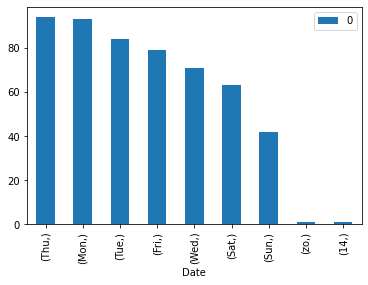

In [25]:
# Create a graph by day of week when the email was sent
# Does there seem to be a difference in terms of the day of the week a fraudulent email was sent?
dowdf = re.findall('(?:Date: ).*?(\w+)', text)
df = pd.DataFrame(dowdf, columns=["Date"])
vc = df.value_counts()
vcdf = vc.to_frame()
vcdf.plot(kind="bar")

<AxesSubplot:xlabel='Hour'>

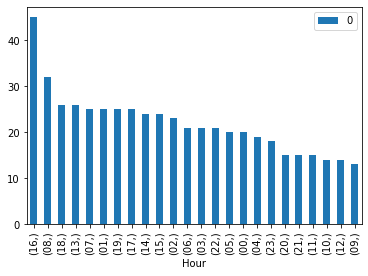

In [27]:
# Create a graph by hour of day when the email was sent
# Does there seem to be a difference in terms of the hour of the day a fraudulent email was sent?
hoddf = re.findall('(?:Date: ).*?\d{4} (\d{2})\:\d{2}', text)
df = pd.DataFrame(hoddf, columns=["Hour"])
vc = df.value_counts()
vcdf = vc.to_frame()
vcdf.plot(kind="bar")